
CLUSTERING EVALUATION METRICS (K-Means with K=5)
Supervised Metrics (Requires Ground Truth):
Adjusted Rand Index (ARI): 0.1608
Adjusted Mutual Information (AMI): 0.1992
--------------------------------------------------
Unsupervised Metrics (Intrinsic Evaluation - Does NOT require Ground Truth):
Silhouette Score: 0.1372
Davies-Bouldin Index (DBI): 1.7795
Calinski-Harabasz Index (CHI): 2215.5264


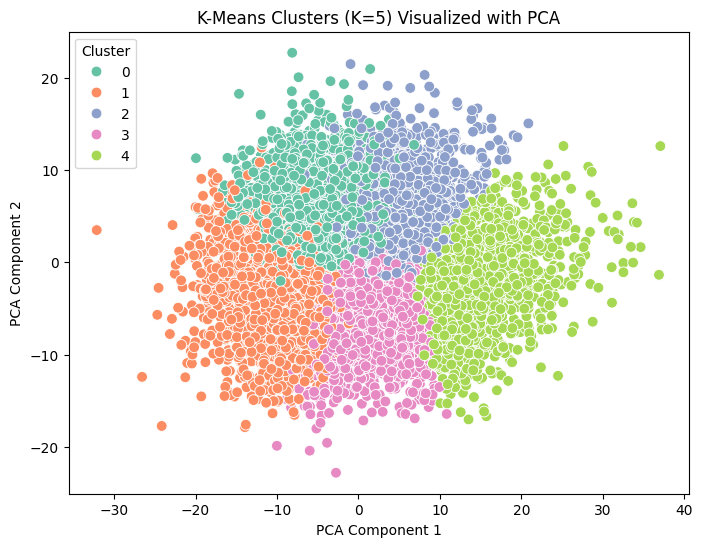

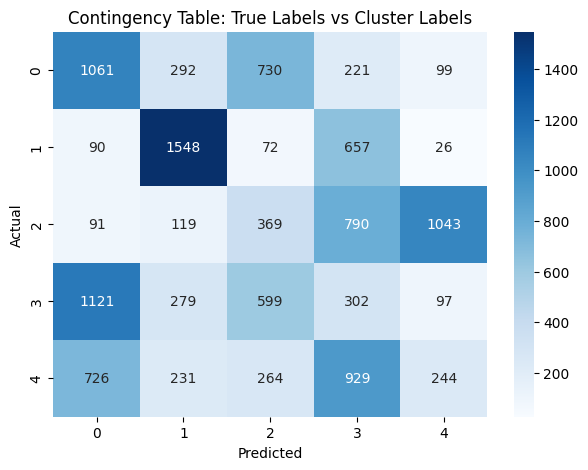

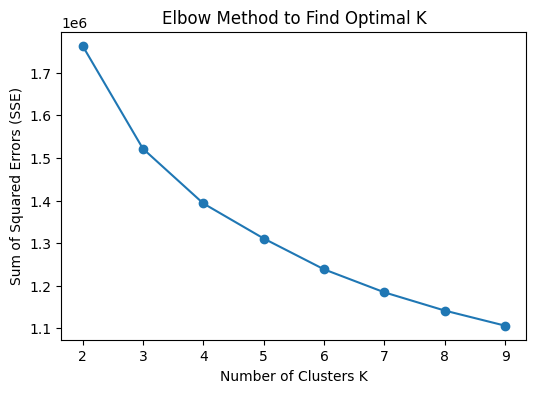

/tmp/ipython-input-2863073477.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set3')


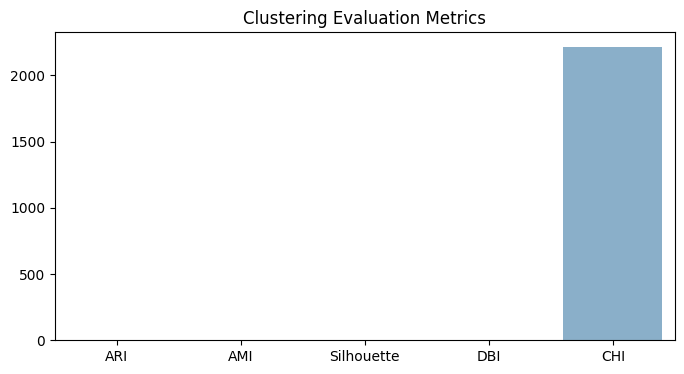

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score, adjusted_mutual_info_score,
    silhouette_score, davies_bouldin_score, calinski_harabasz_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Load the dataset
# -----------------------------
df = pd.read_csv("dataset_classification.csv")

# -----------------------------
# 2. Prepare the data
# -----------------------------
X = df.drop('label', axis=1)
y_true = df['label']  # Ground Truth for Supervised Metrics

# -----------------------------
# 3. Apply K-Means Clustering
# -----------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_pred_cluster = kmeans.fit_predict(X)

# -----------------------------
# 4. Calculate Supervised Metrics
# -----------------------------
ari = adjusted_rand_score(y_true, y_pred_cluster)
ami = adjusted_mutual_info_score(y_true, y_pred_cluster)

# -----------------------------
# 5. Calculate Unsupervised Metrics
# -----------------------------
silhouette = silhouette_score(X, y_pred_cluster)
dbi = davies_bouldin_score(X, y_pred_cluster)
chi = calinski_harabasz_score(X, y_pred_cluster)

# -----------------------------
# 6. Print Metrics
# -----------------------------
print("\n" + "="*60)
print("CLUSTERING EVALUATION METRICS (K-Means with K=5)")
print("="*60)
print("Supervised Metrics (Requires Ground Truth):")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Adjusted Mutual Information (AMI): {ami:.4f}")
print("-" * 50)
print("Unsupervised Metrics (Intrinsic Evaluation - Does NOT require Ground Truth):")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")
print(f"Calinski-Harabasz Index (CHI): {chi:.4f}")
print("="*60)

# -----------------------------
# 7. Visualize Clusters with PCA (2D)
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred_cluster, palette='Set2', s=60)
plt.title("K-Means Clusters (K=5) Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# -----------------------------
# 8. Supervised Confusion Matrix-like Heatmap
# -----------------------------
cm = pd.crosstab(y_true, y_pred_cluster, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Contingency Table: True Labels vs Cluster Labels")
plt.show()

# -----------------------------
# 9. Optional: Elbow Method to justify K
# -----------------------------
sse = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters K")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method to Find Optimal K")
plt.show()

# -----------------------------
# 10. Optional: Bar Plot of Metrics
# -----------------------------
metrics = {'ARI': ari, 'AMI': ami, 'Silhouette': silhouette, 'DBI': dbi, 'CHI': chi}
plt.figure(figsize=(8,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set3')
plt.title("Clustering Evaluation Metrics")
plt.show()
